In [ ]:
%%time
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
from dataclasses import dataclass
from pathlib import Path

import pandas as pd
from dotenv import load_dotenv


@dataclass
class Config:
    project_dir: Path = Path("../../")
    model_dir: Path = project_dir / "models"
    outputs_dir: Path = project_dir / "outputs"
    data_dir: Path = project_dir / "data"
    results_dir: Path = project_dir / "results"
    results_agg_dir: Path = results_dir / "agg"
    results_figs_dir: Path = results_dir / "figs"
    raw_dir: Path = data_dir / "raw"
    interim_dir: Path = data_dir / "interim"
    processed_dir: Path = data_dir / "processed"


config = Config()
sys.path.append(str(config.project_dir.resolve()))
load_dotenv()

CPU times: user 265 ms, sys: 72.9 ms, total: 338 ms
Wall time: 544 ms


True

In [9]:
df_orders = pd.read_csv(config.interim_dir / "olist_orders_customer_merged.csv")
df_item_products = pd.read_csv(
    config.interim_dir / "olist_item_product_seller_merged.csv"
)
df_orders_item_products_merged = pd.merge(
    df_orders, df_item_products, on="order_id", how="left"
)
assert (
    df_orders_item_products_merged["order_id"].nunique()
    == df_orders["order_id"].nunique()
)

### 対象期間の購入回数

In [10]:
df_orders_item_products_merged[
    ["customer_unique_id", "customer_id"]
].drop_duplicates().groupby("customer_unique_id").agg(
    {
        "customer_id": "nunique",
        # "customer_id": "size",
    }
).sort_values("customer_id", ascending=False).value_counts()

customer_id
1              93099
2               2745
3                203
4                 30
5                  8
6                  6
7                  3
9                  1
17                 1
Name: count, dtype: int64

In [7]:
df_orders.groupby("customer_unique_id").agg(
    {
        "customer_id": "nunique",
        # "customer_id": "size",
    }
).sort_values("customer_id", ascending=False).head(2)

,customer_id
customer_unique_id,
8d50f5eadf50201ccdcedfb9e2ac8455,17
3e43e6105506432c953e165fb2acf44c,9


In [13]:
df_orders_item_products_merged.query(
    "customer_unique_id == '8d50f5eadf50201ccdcedfb9e2ac8455'"
)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approved_span,order_delivered_customer_date_span,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
2655,c2213109a2cc0e75d55585b7aaac6d97,897b7f72042714efaa64ac306ba0cafc,delivered,2018-08-07 23:32:14,2018-08-07 23:45:21,2018-08-09 13:35:00,2018-08-10 20:26:44,2018-08-13,0 days 00:13:07,2 days 20:54:30,...,333.0,2.0,200.0,30.0,20.0,20.0,sports_leisure,4265.0,sao paulo,SP
4112,23427a6bd9f8fd1b51f1b1e5cc186ab8,a8fabc805e9a10a3c93ae5bff642b86b,delivered,2018-05-21 22:44:31,2018-05-22 01:53:35,2018-05-22 14:18:00,2018-05-23 15:33:09,2018-05-29,0 days 03:09:04,1 days 16:48:38,...,282.0,1.0,300.0,35.0,6.0,11.0,sports_leisure,3126.0,sao paulo,SP
5829,e3071b7624445af6e4f3a1b23718667d,0bf8bf19944a7f8b40ba86fef778ca7c,delivered,2017-09-05 22:14:52,2017-09-05 22:30:56,2017-09-06 15:26:12,2017-09-11 13:27:49,2017-09-22,0 days 00:16:04,5 days 15:12:57,...,784.0,2.0,343.0,32.0,10.0,20.0,sports_leisure,15015.0,sao jose do rio preto,SP
13241,d3582fd5ccccd9cb229a63dfb417c86f,a682769c4bc10fc6ef2101337a6c83c9,delivered,2018-08-20 19:14:26,2018-08-20 19:30:05,2018-08-21 15:11:00,2018-08-24 14:08:43,2018-09-04,0 days 00:15:39,3 days 18:54:17,...,369.0,1.0,400.0,16.0,2.0,11.0,costruction_tools_tools,80250.0,curitiba,PR
18453,5837a2c844decae8a778657425f6d664,31dd055624c66f291578297a551a6cdf,unavailable,2017-07-17 22:11:13,2017-07-17 22:23:46,NaN,NaN,2017-08-17,0 days 00:12:33,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21770,bf92c69b7cc70f7fc2c37de43e366173,42dbc1ad9d560637c9c4c1533746f86d,delivered,2017-07-24 22:11:50,2017-07-24 22:25:14,2017-07-26 01:42:03,2017-07-31 16:59:58,2017-08-15,0 days 00:13:24,6 days 18:48:08,...,1182.0,4.0,900.0,50.0,6.0,20.0,sports_leisure,89204.0,joinville,SC
28361,6bdf325f0966e3056651285c0aed5aad,6289b75219d757a56c0cce8d9e427900,delivered,2018-05-22 23:08:55,2018-05-22 23:36:01,2018-05-23 19:02:00,2018-05-24 11:58:23,2018-05-30,0 days 00:27:06,1 days 12:49:28,...,203.0,1.0,1000.0,16.0,6.0,12.0,sports_leisure,13060.0,campinas,SP
38459,4f62d593acae92cea3c5662c76122478,dfb941d6f7b02f57a44c3b7c3fefb44b,delivered,2017-07-18 23:10:58,2017-07-18 23:23:26,2017-07-20 19:00:02,2017-07-21 16:19:40,2017-07-31,0 days 00:12:28,2 days 17:08:42,...,99.0,3.0,150.0,20.0,20.0,20.0,fashion_bags_accessories,4265.0,sao paulo,SP
44950,b850a16d8faf65a74c51287ef34379ce,1bd3585471932167ab72a84955ebefea,delivered,2017-11-22 20:01:53,2017-11-22 20:12:32,2017-11-24 16:07:56,2017-11-27 18:49:13,2017-12-04,0 days 00:10:39,4 days 22:47:20,...,87.0,3.0,150.0,20.0,20.0,20.0,sports_leisure,4265.0,sao paulo,SP
66978,519203404f6116d406a970763ee75799,1c62b48fb34ee043310dcb233caabd2e,delivered,2017-08-05 08:59:43,2017-08-05 09:10:13,2017-08-07 18:50:00,2017-08-09 15:22:28,2017-08-25,0 days 00:10:30,4 days 06:22:45,...,NaN,NaN,300.0,35.0,7.0,12.0,NaN,15502.0,votuporanga,SP


In [15]:
df_orders_item_products_merged["order_status"].value_counts()

order_status
delivered      110197
shipped          1186
canceled          706
unavailable       610
invoiced          361
processing        357
created             5
approved            3
Name: count, dtype: int64

<Axes: xlabel='month'>

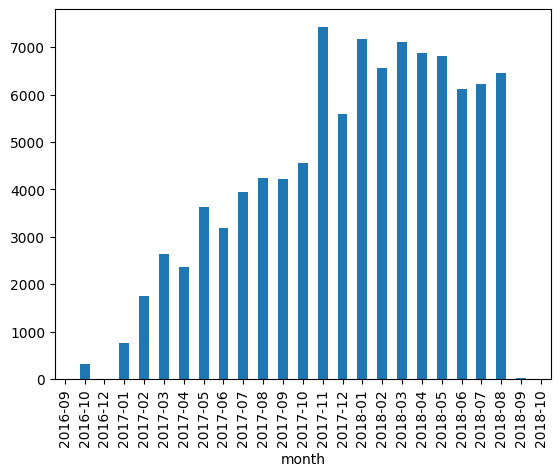

In [18]:
df_orders_item_products_merged[
    ["customer_unique_id", "month", "order_id"]
].drop_duplicates().groupby("month")["customer_unique_id"].nunique().plot(kind="bar")